In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers,Sequential,Model 

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [43]:
X_train = X_train.reshape(60000,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [44]:
X_test = X_test.reshape(10000,28,28,1)
X_test.shape

(10000, 28, 28, 1)

In [47]:
cnn = Sequential([
    
#         cnn
        layers.Conv2D(14,3,activation = 'relu',input_shape = (28,28,1)),
        layers.MaxPooling2D(),
        layers.Conv2D(28,3,activation = 'relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(56,3,activation = 'relu'),
        layers.MaxPooling2D(),

    
    
#         dense
        layers.Flatten(),
        layers.Dense(20,activation = 'relu'),
        layers.Dense(10,activation = 'softmax')
])
cnn.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [48]:
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 1.2674 - accuracy: 0.7221
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1396 - accuracy: 0.9595
Epoch 3/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0923 - accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0700 - accuracy: 0.9796
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0600 - accuracy: 0.9814
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0509 - accuracy: 0.9856
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0431 - accuracy: 0.9863
Epoch 8/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0364 - accuracy: 0.9887
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [49]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0989 - accuracy: 0.9759


[0.09886875003576279, 0.9758999943733215]

In [50]:
y_p = cnn.predict(X_test)
predicted = []
for i in range(len(y_p)):
    predicted.append(np.argmax(y_p[i]))

In [51]:
truth = y_test

In [52]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(truth,predicted)
print(classification_report(truth,predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.95      1.00      0.97      1010
           4       1.00      0.95      0.97       982
           5       0.99      0.96      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.97      1028
           8       0.96      0.99      0.97       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<AxesSubplot:>

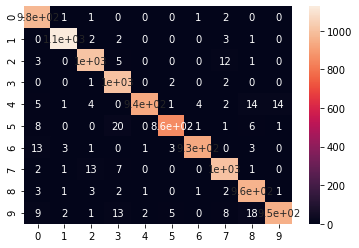

In [53]:
import seaborn as sn
sn.heatmap(cm ,annot=True)